<a href="https://colab.research.google.com/github/aswinigh/Cloth-simulation/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
df_x = pd.read_csv('/content/simulation_data_x.csv')
df_x.head()

,Vertex,x,y,z
0,0,-7.994450,-1.998615,-0.688469
1,1,7.993088,-1.998272,-0.688469
2,2,-7.993095,1.998266,-0.688469
3,3,7.994408,1.998605,-0.688469
4,4,-7.993249,1.787737,-0.688469


In [0]:
import matplotlib.pyplot as plt

In [0]:
frame = []
for i in range(20):
  frame.append(df_x[i*400:i*400+400])

# Data Exploration
We plot the means and standard deviations changing with respect to frame count(time)

In [0]:
means_x = [frame[i][' x '].mean() for i in range(20)]
means_y = [frame[i][' y '].mean() for i in range(20)]
means_z = [frame[i][' z '].mean() for i in range(20)]

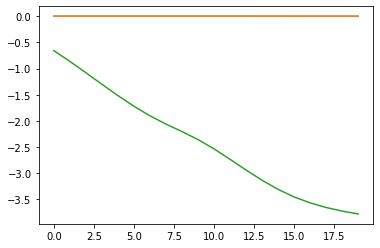

In [0]:
plt.plot([i for i in range(20)], means_x)
plt.plot([i for i in range(20)], means_y)
plt.plot([i for i in range(20)], means_z)
plt.show()

In [0]:
std_x = [frame[i][' x '].std() for i in range(20)]
std_y = [frame[i][' y '].std() for i in range(20)]
std_z = [frame[i][' z '].std() for i in range(20)]

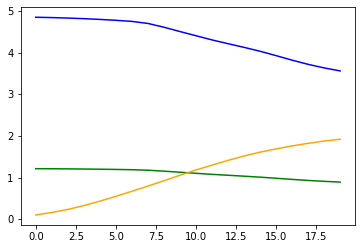

In [0]:
plt.plot([i for i in range(20)], std_x, color='blue')
plt.plot([i for i in range(20)], std_y, color='green')
plt.plot([i for i in range(20)], std_z, color='orange')
plt.show()

In [0]:
from mpl_toolkits.mplot3d import axes3d

def plot_frame(i):
  fig = plt.figure()
  #ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
  ax = fig.gca(projection='3d')
  ax.set_zlim3d(-8,2)
  ax.scatter(frame[i][' x '],frame[i][' y '],frame[i][' z '])

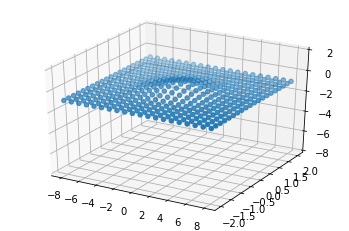

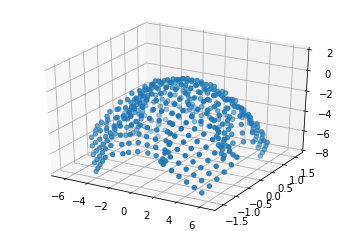

In [0]:
plot_frame(1)
plot_frame(19)

# Data preperation

1.   We keep all the vertices for each frame in a single vector x(t) where t is the frame.
2.   We make a matrix X combining all the x(t) into a single matrix.



In [0]:
for t in range(20):
  frame[t] = frame[t].drop('Vertex ',axis=1)
  frame[t] = frame[t].values.flatten()

In [0]:
frame[0].shape

(1200,)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
principalComponents = pca.fit_transform(frame)

In [0]:
pca.components_.shape

(16, 1200)

In [0]:
principalComponents[0]

array([ 4.14672012e+01,  5.44398568e+00,  3.37521529e+00,  6.99094935e-01,
       -7.00112780e-01,  4.68835798e-01,  1.88166351e-01,  1.24055877e-01,
       -2.92960942e-02, -4.46851774e-02,  4.80602652e-02, -6.98452559e-03,
        6.55112113e-03,  1.22963205e-02, -1.41681180e-02, -5.69262957e-04])

In [0]:
pca.inverse_transform(principalComponents[0])

array([-7.99442886, -1.99861591, -0.688608  , ...,  7.15259772,
        1.78815319, -0.68857755])

In [0]:
frame[0]

array([-7.99444962, -1.99861538, -0.68846944, ...,  7.15260887,
        1.78815532, -0.68848393])

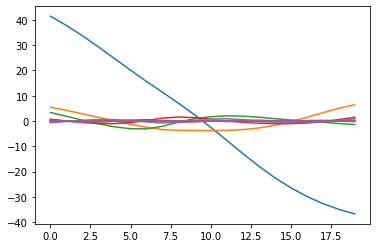

In [35]:
for j in range(15):
  plt.plot([i for i in range(20)], [principalComponents[i][j] for i in range(20)])



In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
zt = principalComponents

In [0]:
x1 = np.array([[principalComponents[i+1][0],principalComponents[i+1][0]-principalComponents[i][0]] for i in range(18)])

In [0]:
y1 = np.array([principalComponents[i][0] for i in range(2,20)])

In [0]:
regressor = LinearRegression().fit(x1,y1)

In [50]:
regressor.coef_

array([0.98821452, 1.0384074 ])

In [0]:
z_pred = regressor.predict(x1)

In [0]:
z_new = []
for i in range(18):
  z_new.append([z_pred[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [64]:
z_new

[[33.84039679351316, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [29.370668358932143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [24.67017631463287, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [19.917234018055566, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [15.341369042844063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11.11130263415401, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [7.052578761143839, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2.685444300225133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-2.0837888017185313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-7.225942007337771, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-12.6039520457476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-17.833320331765997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-22.56753816553642, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-26.614832628226992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-29.97223530987729, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
z_new = pca.inverse_transform(z_new)

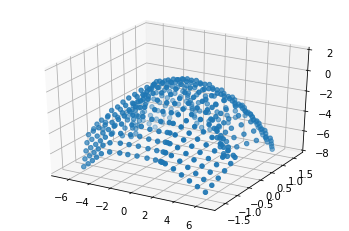

In [88]:
i=15
z_x = [z_new[i][j] for j in range(0,1200,3)]
z_y = [z_new[i][j] for j in range(1,1200,3)]
z_z =  [z_new[i][j] for j in range(2,1200,3)]
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')
ax.set_zlim3d(-8,2)
ax.scatter(z_x,z_y,z_z)

In [73]:
len(z_new[0])

16